<a href="https://colab.research.google.com/github/andreramalho1991/my_projects/blob/main/Analise_Cars_PCA_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Máquina Não-Supervisionado com PCA e KMeans

## Breve Introdução a Métodos Não-Supervisionados

### O que é Aprendizado Não-Supervisionado

Diferente do aprendizado supervisionado, cujo o objetivo é inferir comportamento ou prever uma variável resposta $Y'$ para um conjunto de $p$ atributos *($X_1, X_2, X_3, ..., X_p$)* para $n$ medições com base em um conjuto de rótulos $Y$ para cada uma dessas $n$ medições, em um modelo de aprendizado não supervisionado o objeivo é inferir padrões dentro do conjuto de dados de acordo, apenas, com um conjunto de $p$ atributos *($X_1, X_2, X_3, ..., X_p$)* para as $n$ observações, uma vez que os dados não possuem conjunto de rótulos $Y$.

De forma resumida, um modelo de aprendizado de máquina não supervisionado aprende padrões de um conjunto dados, sem que exista uma variável resposta, chamada de rótulo. Oou seja, o algorítimo aprende sem um *professor*.

Segundo **Aurélien Géron** em seu livro *Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow* alguns dos algorítimos mais importantes de aprendizagem de máquina não supervisionado são:

1.   Clustering
* Kmeans
* Clustering Hierárquico
* Maximização da expectativa
2.   Vizualização e redução de dimensionalidade
* PCA (Principal Component Analisys)
* LLE (Locally-Linear Embedding)
* t-SNE (t-distributed Stochastic Neighbor Embedding)
3.   Aprendizado da regra de associação
* Apriori
* Eclat

Aqui, falaremos sobre duas técnicas que geralmente são usadas em conjunto: *PCA* e *Kmeans*

### O que é PCA - Principal Component Analysis?

PCA, ou Análise de Componentes Principais, é uma ferramenta utilizada para redução pré-processamento de dados e redução de dimensionalidade.De forma resumida, o PCA encontra o hiperplano mais próximo dos dados e, então projeta os dados sobre ele.

Quando um conjunto de dados possui muitos atributos $p$ correlacionados, a nálise de componentes principais nos permite resumir esses dados para um número menor de varíaveis, que em conjunto, explicam a maior parte da variância do conjunto de dados original. O PCA é uma técnica muito utilizada, também, em modelos supervisionados pois reduz a dimensionalidade dos dados e permite a substituição do conjunto de dados originais por um conjunto menor de dados que representam a maior parte da variabilidade desses dados. O emprego da ferramenta possui alguns benefícios para modelos supervisionados. Para uma leitura mais abrangente sobre PCA sugiro o livro An Introduction to Statistical Learning, que pode ser encontrado de forma gratuita no link abaixo, na página oficial do livro:

> 📖 [An Introduction to Statistical Learning](https://www.statlearning.com/)


> 🔑 **Importante:** O PCA não é um método para seleção de variáveis, uma vez que cada componente principal é uma combinação linear dos atributos, e não a variável original.

### O que é K-means?

O K-means é um algorítimo que utiliza a distância entre pontos e clusters para determinar se uma determinada observação pertence a um cluster ou outro.

**Gareth James et. al**, em *An introduction to Statistical Learning*, descre  o K-means como uma abordagem simples e elegante para particionar um conjunto de dados em K grupos (clusters) distintos e não sobrepostos. 

Para fazer isso, o algorítimo particiona os dados de forma a minimizar a variáncia dentro do cluster. No entanto, para performar o agrupamento dos dados (clusterizar), nós devemos primeiro informar o número de clusters desejados. 

🤔 Mas como saber o número ótimo de clusters?

Testando!😁

Geralmente testamos vários números de clusters e selecionamos o número em que a a soma das distâncias quadráticas das amostras em relação ao centro do seu cluster mais próximo seja a menor, respeitando o método do cotovelo (do ingles *Elbow Method*).

A técnica é relativamente simples e mostraremos ao longo desse projeto! 😉

## Criando um modelo não supervisionado com PCA e K-means

Vamos criar um modelo de aprendizado não supervisionado para clusterização de carros e analisar os cluster formados. Após a análise, faremos um paralelo com os clusters formados e como eles poderiam ser utilizados para sugestão de carros para determinados perfis de clientes.

### Importando as Bibliotecas

In [53]:
import pandas as pd #pandas para manipulação de dados
import numpy as np #numpy 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Análise Explortória dos Dados

In [55]:
# Importando os dados
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/01.PCA_e_Kmeans/cars.csv')
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [56]:
# Analisando o tipo de cada variável
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


Os atributos `cubicinches` e `weightlibs`aparentam ser atributos do tipo numérico, mas estão como texto. Vamos transformar os dados, ams antes vamos confirmar se existem valores faltando no conjunto de dados.

Logo de início, ao que parece, é que não existem valores faltando, uma vez que todas as variáveis possuem a mesma quantidade de valores não nulos.

Vamos construir uma função para checar gráficamente se existem valores faltando do conjunto de dados, pois precisaremos dela novamente após a conversão das variáveis `cubcinhes`e `weightlibs`. Geralmente, após a conversão, alguns valores são convertidos para valores nulos e precisaremos entender o impacto disso no nosso conjunto de dados.

### Encontrando padrões nos dados e ajustando atributos

In [57]:
def null_values_check(data_frame=df):
  """
  Função para checar o número de valores faltando em um conjunto de dados
  """
  plt.figure(figsize=(10, 7))
  data_frame.isnull().sum().plot(kind='bar')
  plt.show()

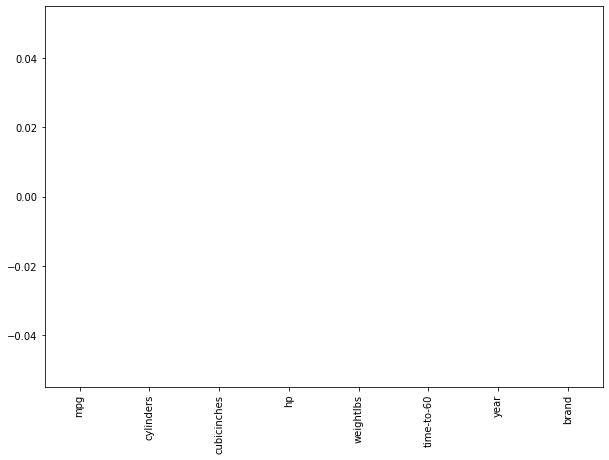

In [58]:
null_values_check(df)

Confirmado! Não existem valores faltando no conjunto de dados. Agora vamos converter as variáveis em valores numéricos.

In [59]:
df.cubicinches = pd.to_numeric(df.cubicinches, errors='coerce')
df.weightlbs = pd.to_numeric(df.weightlbs, errors='coerce')

Vamos verificar se houve cerção de algum erro em valores nulos.

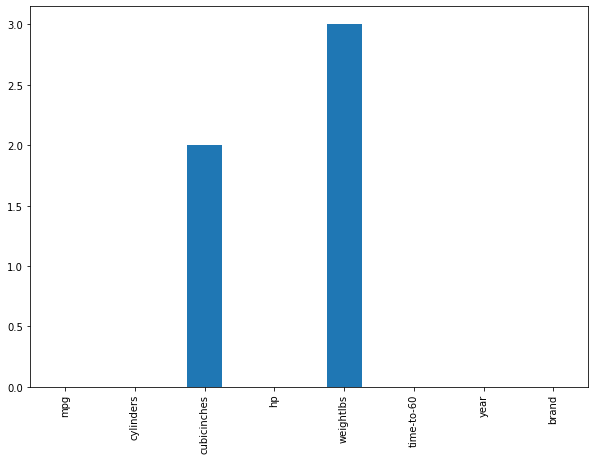

In [60]:
null_values_check(df)

Cinco valores nulos foram encontrados após a conversão das variáveis em valores numéricos.

Agora só temos `brand` como variável não numérica. Para simplificar, vamos descartar essa variável do modelo.

In [61]:
df=df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year']]
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


Agora vamos fazer uma análise estatística do modelo...

In [62]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


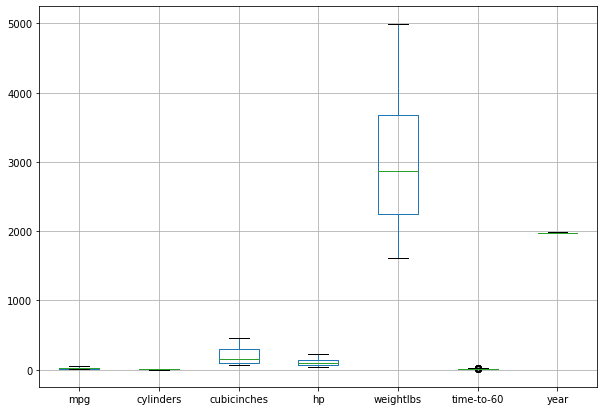

In [63]:
df.boxplot(figsize=(10,7))

A variável `cubicinhes`possui distribuição levemente assimétrica, com maior dispersão dos valores acima da mediana.

Para a variável `weightlibs`enchergamos uma maior dispersão dos valores abaixo da mediana, mais  especificamente no segundo quartil.

Diante dessa assimetria, realizaremos o *input* dos valores faltando de acordo com os valores da mediana, pois essa é uma medida mais estável.

### Encontrando Outliers

Para checar outliers, utilizaremos a regra do intervalo interquartil.

A regra do intervalo interquartil (Interquartile Range Rule) pode ser calculada da seguinte forma:
1. Encontre o valor para o primeir e terceiro quartil e encontre o intervalo entre eles;
2. Multiplique o intervalo interquartil (IQR) por 1.5 e você terá encontrado a constante para encontrar outliers;
3. Some a constante (IQR) ao terceiro quartil e encontrará o limite superior (valor máximo);
4. Subtrais a constante (IQR) ao primeiro quartil e encontrará o limite inferior (valor mínimo);
5. Os valosre que forem maior que o limite superior ou menor que o liite inferior será um outlier.

In [64]:
# Substituindo valores faltando pela média da variávbel.
df.weightlbs = df.weightlbs.fillna(df.weightlbs.median())
df.cubicinches = df.cubicinches.fillna(df.cubicinches.median())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
def find_outliers(data_frame, column):
  # encontrando o primeiro quartil
  q1 = np.quantile(data_frame[column], 0.25)
  # encontrando o terceiro quartil
  q3 = np.quantile(data_frame[column], 0.75)

  iqr = q3-q1

  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)

  data_frame_filtered = data_frame[(data_frame[column]>=upper_bound) | (data_frame[column]<=lower_bound)]

  return data_frame_filtered, upper_bound, lower_bound



In [66]:
for column in df.columns:
  outlier_df, outlier_upper_bound, outlier_lower_bound = find_outliers(df, column=column)
  print("Variável:", column)
  print(outlier_df)

Variável: mpg
Empty DataFrame
Columns: [mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year]
Index: []
Variável: cylinders
Empty DataFrame
Columns: [mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year]
Index: []
Variável: cubicinches
Empty DataFrame
Columns: [mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year]
Index: []
Variável: hp
Empty DataFrame
Columns: [mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year]
Index: []
Variável: weightlbs
Empty DataFrame
Columns: [mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year]
Index: []
Variável: time-to-60
      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year
7    14.0          8        440.0  215     4312.0           9  1971
51   27.2          4        141.0   71     3190.0          25  1980
52   14.0          8        340.0  160     3609.0           8  1971
106  43.4          4         90.0   48     2335.0          24  1981
164  23.0          4         97.0   54     2254.0          2

Foram encontrados outliers para a variável `time-to-60`. Vamos tratá-los...

In [67]:
time_60_outliers, time_60_upper_bound, time_60_lower_bound = find_outliers(df, 'time-to-60')
time_60_outliers.sort_values(by='time-to-60', ascending=False), time_60_upper_bound, time_60_lower_bound

(      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year
 51   27.2          4        141.0   71     3190.0          25  1980
 235  44.0          4         97.0   52     2130.0          25  1983
 106  43.4          4         90.0   48     2335.0          24  1981
 164  23.0          4         97.0   54     2254.0          24  1973
 197  43.1          4         90.0   48     1985.0          22  1979
 202  23.9          8        260.0   90     3420.0          22  1980
 247  44.3          4         90.0   48     2085.0          22  1981
 7    14.0          8        440.0  215     4312.0           9  1971
 205  15.0          8        390.0  190     3850.0           9  1971
 244  14.0          8        454.0  220     4354.0           9  1971
 52   14.0          8        340.0  160     3609.0           8  1971,
 21.5,
 9.5)

In [68]:
time_60_outliers

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
7,14.0,8,440.0,215,4312.0,9,1971
51,27.2,4,141.0,71,3190.0,25,1980
52,14.0,8,340.0,160,3609.0,8,1971
106,43.4,4,90.0,48,2335.0,24,1981
164,23.0,4,97.0,54,2254.0,24,1973
197,43.1,4,90.0,48,1985.0,22,1979
202,23.9,8,260.0,90,3420.0,22,1980
205,15.0,8,390.0,190,3850.0,9,1971
235,44.0,4,97.0,52,2130.0,25,1983
244,14.0,8,454.0,220,4354.0,9,1971


### Tratando Outliers

Para tratar os outliers podemos criar um modelo de regressão para fazer o input do valor de forma mais refinada.

Primeiro, vamos excluir todas as linhas que possuam outliers e depois criaremos um modelo de aprendizado supervisionado para substiruir os valores de forma mais refinada..

In [69]:
df_sem_outliers = df.copy()
df_sem_outliers = df_sem_outliers.drop(time_60_outliers.index, axis=0)
df_sem_outliers

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980
257,36.1,4,91.0,60,1800.0,16,1979
258,22.0,6,232.0,112,2835.0,15,1983
259,18.0,6,232.0,100,3288.0,16,1972


In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

X = df_sem_outliers.drop('time-to-60', axis=1)
y = df_sem_outliers['time-to-60']

scorer = make_scorer(mean_squared_error)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

rf_model_1 = RandomForestRegressor(random_state=42, criterion='absolute_error',warm_start=True)
scores_1 = cross_val_score(rf_model_1, X_train, y_train, cv=5, scoring=scorer)
model_1_score = np.sqrt(scores_1.mean())
model_1_score

1.6086567766307391

In [71]:
rf_model_1.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', random_state=42,
                      warm_start=True)

O modelo 1 apresentou um RMSE de 1.60. Vamos tentar melhorar o  modelo com o RandomizedSearchCV.

In [72]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import random
from random import randint, seed

skfolder = StratifiedKFold(n_splits=5)

random.seed(42)
n_estimators = 50
estimators = [randint(10,200) for _ in range(0,n_estimators)]

rf_params = dict(
    n_estimators = estimators,
    criterion= ['squared_error', 'absolute_error'],
    bootstrap= [True, False],
    warm_start= [True, False]
    )
     

rf = RandomForestRegressor(random_state=42)

rf_model_2 = RandomizedSearchCV(rf, 
                                param_distributions=rf_params,
                                cv = skfolder,
                                scoring = make_scorer(mean_squared_error),
                                random_state=42,
                                n_iter=5               
                                )


In [73]:
rf_model_2.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(random_state=42), n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'n_estimators': [173, 38, 16, 199, 80,
                                                         72, 67, 45, 198, 36,
                                                         183, 199, 149, 32, 161,
                                                         118, 18, 17, 33, 65,
                                                         69, 139, 164, 16, 153,
                                                         60, 193, 176, 189, 149, ...],
                                        'warm_start': [True, False]},
                   random_state=42, scoring=make_scorer(mean_squared_er

In [74]:
model_2_best_score = np.sqrt(rf_model_2.best_score_)
model_2_best_score

1.933601962898757

In [75]:
results = {
    'Modelos': ['Modelo 1', 'Modelo 2'],
    'RMSE': [model_1_score, model_2_best_score]
}

pd.DataFrame(results)

,Modelos,RMSE
0,Modelo 1,1.608657
1,Modelo 2,1.933602


O modelo 1 apresentou o melhor resultado, sendo assim, vamos fazer as previsões no modelo de teste e ver como ele se comporta.

In [76]:
predictions = rf_model_1.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))

1.198431474887071

O modelo apresentou um melhor resultado do que nos dados de treino. Já que descobrimos que o modelo 1 generalizou bem nos dados de teste, vamos treiná-lo nos dados completos e o usaremos para substituir os outliers com os valores preditos.

In [77]:
rf_model_1 = RandomForestRegressor(random_state=42, criterion='absolute_error',warm_start=True)
rf_model_1.fit(X, y)

RandomForestRegressor(criterion='absolute_error', random_state=42,
                      warm_start=True)

In [78]:
feature_outliers = time_60_outliers.drop('time-to-60', axis=1)
outliers_values = time_60_outliers['time-to-60']

feature_outliers_predictions = rf_model_1.predict(feature_outliers)
np.sqrt(mean_squared_error(outliers_values, feature_outliers_predictions))

4.346365252609462

In [79]:
outlier_check_list = pd.Series(feature_outliers_predictions).\
                          apply(lambda x : "Yes" \
                          if (x <= time_60_upper_bound and
                          x >= time_60_lower_bound) else
                          'No').tolist()

In [80]:
pd.DataFrame(data = {'Outliers Predicted':feature_outliers_predictions,
                     'Outliers Values': outliers_values,
                     'Lower bound': time_60_lower_bound,
                     'Upper bound': time_60_upper_bound,
                     'Valuable Value': outlier_check_list
                     }
)

,Outliers Predicted,Outliers Values,Lower bound,Upper bound,Valuable Value
7,10.43,9,9.5,21.5,Yes
51,17.97,25,9.5,21.5,Yes
52,11.68,8,9.5,21.5,Yes
106,19.21,24,9.5,21.5,Yes
164,18.99,24,9.5,21.5,Yes
197,18.87,22,9.5,21.5,Yes
202,18.02,22,9.5,21.5,Yes
205,10.54,9,9.5,21.5,Yes
235,17.56,25,9.5,21.5,Yes
244,10.40,9,9.5,21.5,Yes


Todos os valores preditos estão dentro do intervalo aceitável definido pela regra do intervalo interquartil. Vamos incorporá-los ao conjunto de dados original.

In [81]:
feature_outliers['time-to-60'] = feature_outliers_predictions
df_treated = pd.concat([df_sem_outliers, feature_outliers], axis=0)

In [82]:
df_treated

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12.00,1972
1,31.9,4,89.0,71,1925.0,14.00,1980
2,17.0,8,302.0,140,3449.0,11.00,1971
3,15.0,8,400.0,150,3761.0,10.00,1971
4,30.5,4,98.0,63,2051.0,17.00,1978
...,...,...,...,...,...,...,...
202,23.9,8,260.0,90,3420.0,18.02,1980
205,15.0,8,390.0,190,3850.0,10.54,1971
235,44.0,4,97.0,52,2130.0,17.56,1983
244,14.0,8,454.0,220,4354.0,10.40,1971


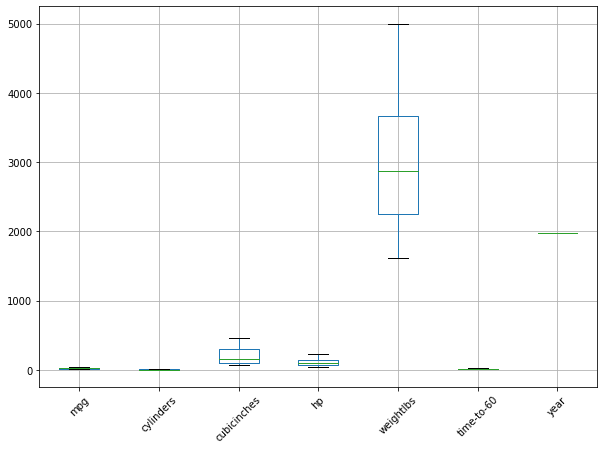

In [83]:
df_treated.boxplot(figsize=(10,7))
plt.xticks(rotation=45);

Usaremos o conjunto de dados tratado para criar o modelo não supervisionado. No entanto, antes de seguirmos com a modelagem, vamos dar uma olha na correlação entre as variáveis.

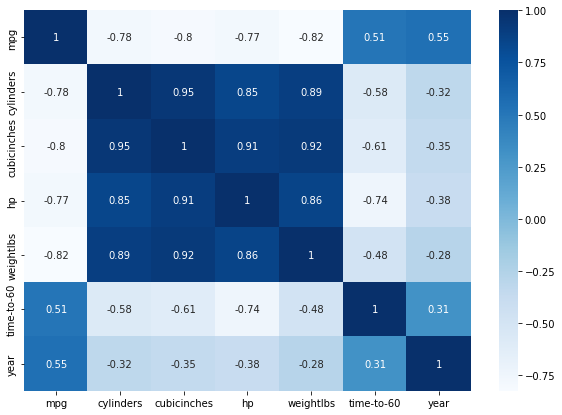

In [84]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

O gráfico acima nos mostra que as variáveis `cylinders`,`cubcinches`, `hp`, e `wheightlibs`são altamente correlacionadas.

🤔 O que fazemos com conjunto de dados que possuem variáveis altamente correlacionadas?
 > Reduzimos dimensionalidade!!


## Construindo um modelo não supervisionado com PCA e KMeans

In [85]:
df_treated.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12.0,1972
1,31.9,4,89.0,71,1925.0,14.0,1980
2,17.0,8,302.0,140,3449.0,11.0,1971
3,15.0,8,400.0,150,3761.0,10.0,1971
4,30.5,4,98.0,63,2051.0,17.0,1978


### Normalizando os dados

> Modelos baseados em distância, tal como Kmeans, são afetados por variáveis em diferentes escalas, por isso é importante normalizar as variáveis.

In [86]:
scaler = MinMaxScaler()
df_scaled =  scaler.fit_transform(df_treated)

In [87]:
df_scaled.shape

(261, 7)

In [88]:
pd.DataFrame(df_scaled, columns=df.columns).describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.359148,0.518008,0.342570,0.328044,0.412292,0.495158,0.484994
std,0.213759,0.346662,0.281416,0.220108,0.250956,0.234123,0.303141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188525,0.200000,0.085271,0.157609,0.189421,0.363636,0.250000
50%,0.327869,0.600000,0.227390,0.266304,0.370715,0.545455,0.500000
75%,0.513661,1.000000,0.604651,0.500000,0.606087,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Encontrando os Componentes Principais

In [89]:
pca = PCA(n_components=7)
pca_array = pca.fit_transform(df_scaled)

In [90]:
variancia_explicada = pca.explained_variance_ratio_
variancia_explicada

array([0.7206363 , 0.15734121, 0.07012131, 0.02527918, 0.01440279,
       0.00671901, 0.0055002 ])

In [91]:
variancia_explicada.cumsum()

array([0.7206363 , 0.87797751, 0.94809882, 0.973378  , 0.98778079,
       0.9944998 , 1.        ])

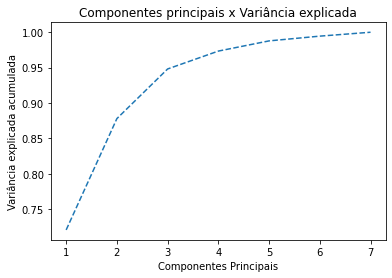

In [92]:
sns.lineplot(x = np.arange(1,8), y=variancia_explicada.cumsum(), linestyle='--')
plt.xlabel('Componentes Principais')
plt.ylabel('Variância explicada acumulada')
plt.title('Componentes principais x Variância explicada');

Apenas 3 componentes principais explicam aproximadamente 95% da variância do dataset.

In [93]:
pd.DataFrame(pca_array, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.944762,0.170589,-0.066143,-0.025103,0.035710,-0.052367,0.011231
1,-0.597205,-0.111508,-0.304064,-0.029629,-0.073764,-0.015021,-0.017389
2,0.775080,0.299292,-0.206774,-0.188886,-0.083489,-0.047399,0.015616
3,0.985475,0.250069,-0.242271,-0.131292,-0.010620,-0.008742,-0.153972
4,-0.608476,0.049010,-0.026101,-0.051484,-0.018710,0.012576,-0.020784
...,...,...,...,...,...,...,...
256,0.217257,-0.386328,0.337985,-0.289660,-0.088493,0.000023,0.039630
257,1.044809,0.239076,-0.239723,-0.052177,0.098198,0.074116,-0.004257
258,-0.850066,-0.392288,-0.059793,-0.212996,0.156864,-0.059594,-0.024757
259,1.244698,0.184876,-0.225223,0.049774,0.245658,0.103310,-0.034721


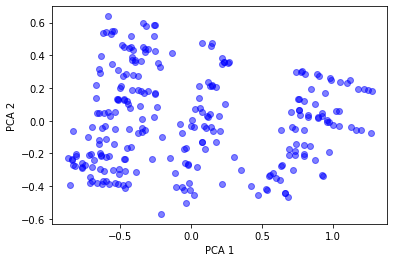

In [94]:
#criando o dataset com as componentes
PCA_components = pd.DataFrame(pca_array, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

#realizando o plot em duas dimensões (componentes 1 e 2 )
plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], alpha=.5, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

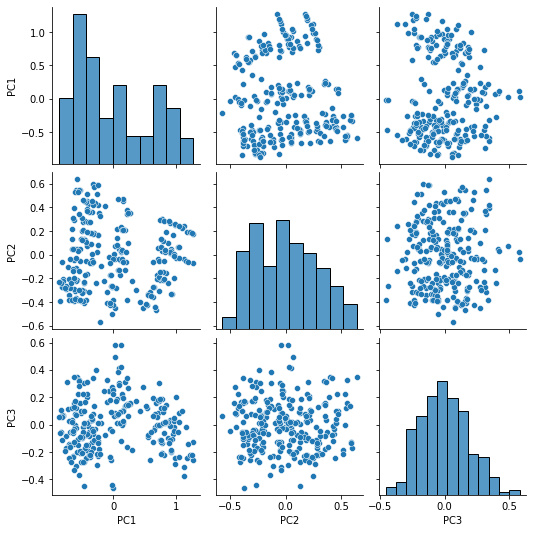

In [95]:
sns.pairplot(PCA_components.iloc[:, :3])

### Encontrando clusters com KMeans

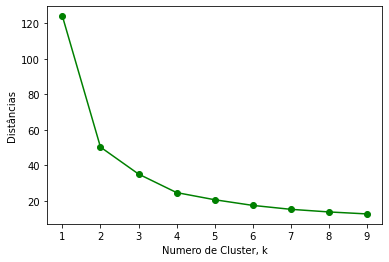

In [96]:
#aplicando o curva do cootovelo para encontrar o número de clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Cria o obeto para modelo kmens para os testes
    model = KMeans(n_clusters=k)
    
    # Aplica nas componentes selecionadas (3 componentes)
    model.fit(PCA_components.iloc[:,:3])
    
    # Adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='green')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()


O atributo `inertia_` do SkLearn permite encontrar a soma do quadrado das distâncias entre as amostras e o centroide do cluster a  que são atribuídas.

De acordo com o método do cotovelo, 3 clusters são um bom número para o problema proposto. Vamos treinar novamente o modelo no número de clusters escolhido.

In [97]:
# implementando o K-means com 3 clusters
k_means_pca=KMeans(n_clusters=3)
k_means_pca.fit(PCA_components.iloc[:,:3])

KMeans(n_clusters=3)

In [98]:
#df com os dados iniciais e de cada uma das componentes
df_segment_pca_kmeans=pd.concat([df_treated.reset_index(drop=True),PCA_components.iloc[:,:3]],axis=1)
df_segment_pca_kmeans.columns.values[-3:]=['Componente 1','Componente 2','Componente 3']
df_segment_pca_kmeans['Seguimento no Kmeans']=k_means_pca.labels_


In [99]:
df_segment_pca_kmeans.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,Componente 1,Componente 2,Componente 3,Seguimento no Kmeans
0,14.0,8,350.0,165,4209.0,12.0,1972,0.944762,0.170589,-0.066143,1
1,31.9,4,89.0,71,1925.0,14.0,1980,-0.597205,-0.111508,-0.304064,0
2,17.0,8,302.0,140,3449.0,11.0,1971,0.775080,0.299292,-0.206774,1
3,15.0,8,400.0,150,3761.0,10.0,1971,0.985475,0.250069,-0.242271,1
4,30.5,4,98.0,63,2051.0,17.0,1978,-0.608476,0.049010,-0.026101,0


Agora, vamos ver como ficou a distribuição dos clusters para os componentes principais, e posteriormente analisaremos os cluster nos dados originais tratados. 😉

In [100]:
#adicionando um dicionário para cada um dos seguimentos
df_segment_pca_kmeans['Cluster']=df_segment_pca_kmeans['Seguimento no Kmeans'].map({0:'C1',
                     1:'C2',
                     2:'C3'})

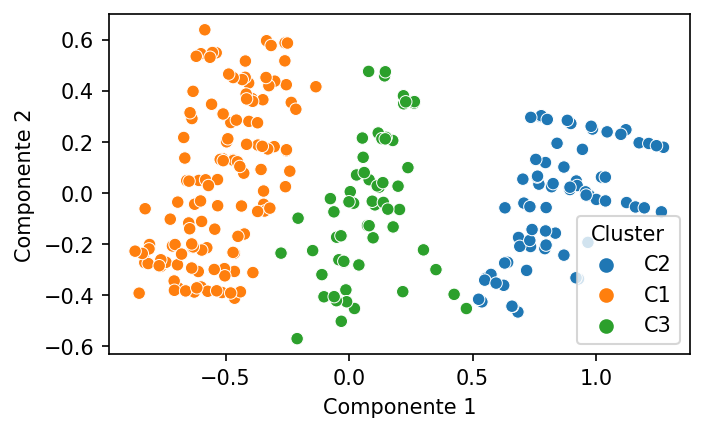

In [128]:
plt.figure(figsize=(5,3), dpi=150)
sns.scatterplot(data=df_segment_pca_kmeans, x='Componente 1', y='Componente 2', hue='Cluster')
plt.show()

Ao que parece, os clusters estão bem divididos, vamos analisar a clusterização junto aos valores originiais tratados...

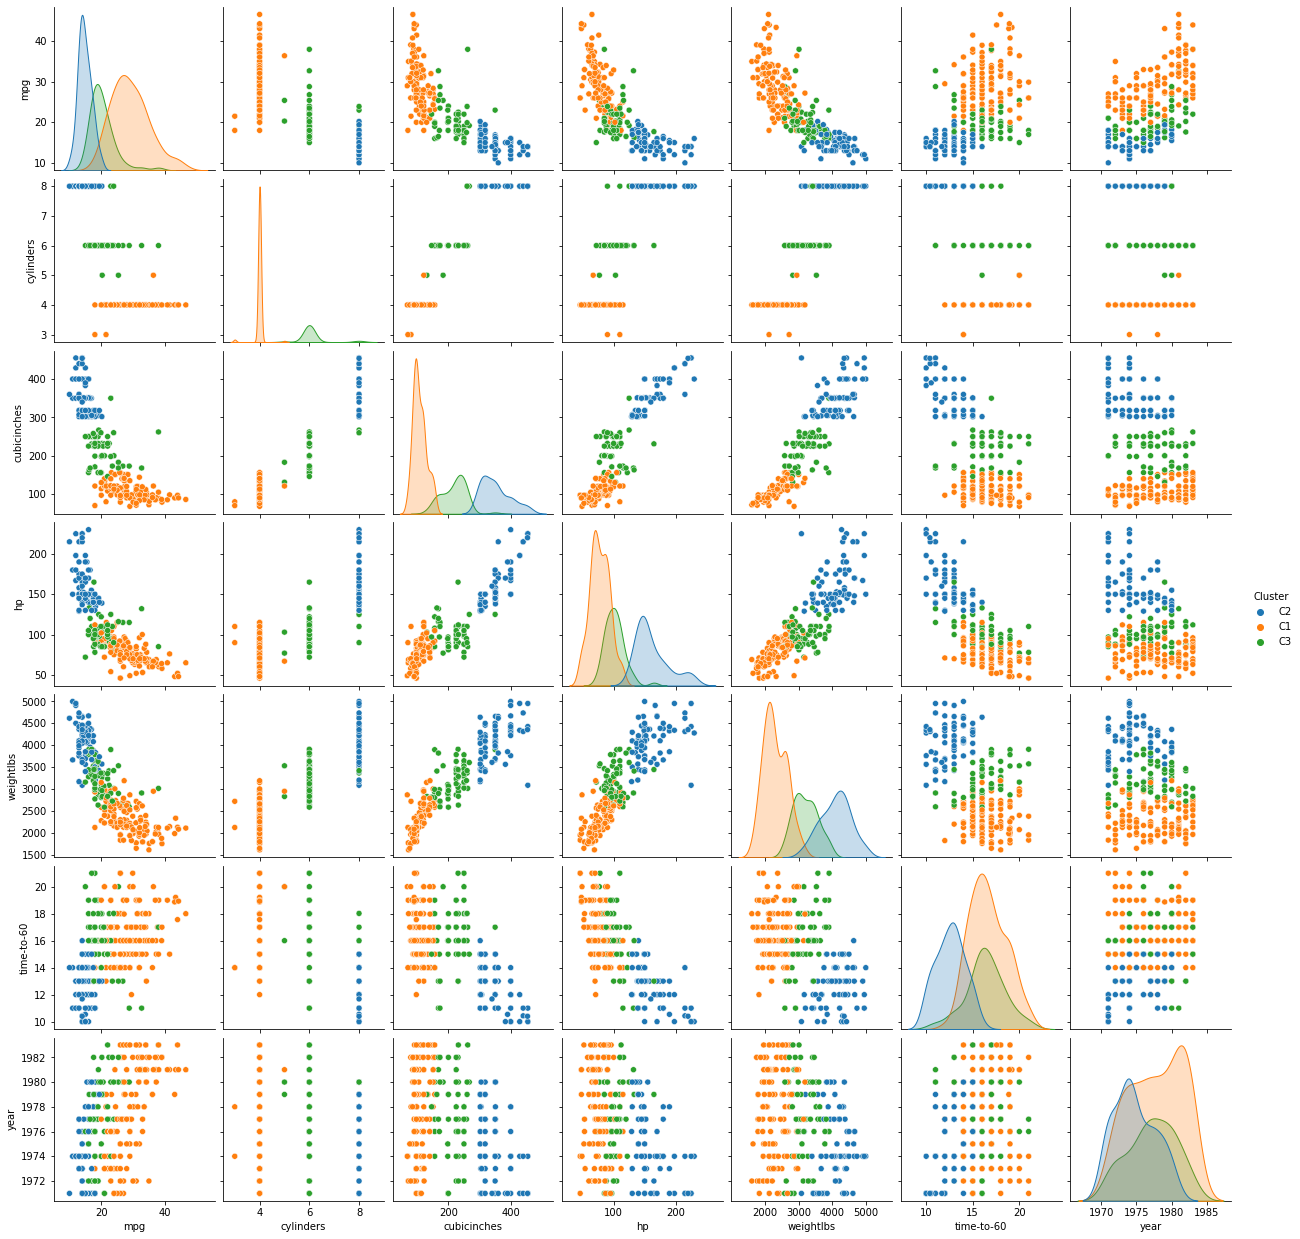

In [101]:
sns.pairplot(df_segment_pca_kmeans[['mpg',	'cylinders',	'cubicinches',	'hp',	'weightlbs',	'time-to-60',	'year', 'Cluster']], hue='Cluster');

Ao analisar os cluster, percebe-se o seguinte:
* **Cluster 1** - é formado por um conjunto de veículos mais econômico, com eficência acima de 25 milhas por galão `mpg`; os veículos desse grupo possuem, em sua maioria, peso menor que os outros dois grupos `weightlbs`; e menor potência `hp`. Esse é um grupo de equipamentos destinado a clientes que busquem por veículos mais econômicos, compactos e que não estejam em busca de motores potentes, mas que atendam às necessidades do dia-a-dia.
* **Cluster 2** - é formado por veículos menos econômicos, com consumo entre 10 e 20 milhas por galão `mpg`; veículos possuem, em sua maiorai, peso maior que os outros dois grupos `weightlbs`; e maior potência `hp`. Esse é um grupo de veículos destinado a clientes que estão em busca de potência sobre economia.
* **Cluster 3** - é formado por veículos intermediários, com um bom balanço entre potência e economia. Esse grupo de equipamentos é destinado a clientes que buscam o equilíbrio entre potência e eficiência.

## Conclusão

A formação de cluster nos permite fazer uma análise mais refinada do nosso conjunto de dados e extrair informações que podem ser usadas em diversos campos de aplicação. 

Para essa análise, por exemplo, fizemos um paralelo entre os cluster formados e uma possível sugestão de carros para 3 tipos de perfil de cliente. 

Essas sugestões podem ser usadas, por exemplo, pelo departamento de marketing para a construção de anúncios com produtos direcionados a cada perfil de cliente, trazendo maior assertividade nas sugestões e aumentando a taxa de conversão dos anúncios.

Por hoje, ficamos por aqui! 😁